In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('../data/raw/turkis_music_emotion_original.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [17]:
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [18]:
df.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [19]:
porcentaje_faltantes = df.isna().mean() * 100
porcentaje_faltantes

Class                                             0.0
_RMSenergy_Mean                                   0.0
_Lowenergy_Mean                                   0.0
_Fluctuation_Mean                                 0.0
_Tempo_Mean                                       0.0
_MFCC_Mean_1                                      0.0
_MFCC_Mean_2                                      0.0
_MFCC_Mean_3                                      0.0
_MFCC_Mean_4                                      0.0
_MFCC_Mean_5                                      0.0
_MFCC_Mean_6                                      0.0
_MFCC_Mean_7                                      0.0
_MFCC_Mean_8                                      0.0
_MFCC_Mean_9                                      0.0
_MFCC_Mean_10                                     0.0
_MFCC_Mean_11                                     0.0
_MFCC_Mean_12                                     0.0
_MFCC_Mean_13                                     0.0
_Roughness_Mean             

Descripción Variables númericas

In [20]:
columnas_numericas = df.select_dtypes(include=[np.number])
describe_df = columnas_numericas.describe()
nom_estadisticas = {
    'mean': 'Media',
    '50%': 'Mediana/Cuartil 50%',
    'min': 'Min',
    'max': 'Max',
    'std': 'Desviacion estandar',
    '25%': 'Cuartil 25%',
    '75%': 'Cuartil 75%'
}

estadisticas = describe_df.rename(index=nom_estadisticas).drop(index='count')
estadisticas

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
Media,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
Desviacion estandar,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
Min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
Cuartil 25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
Mediana/Cuartil 50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
Cuartil 75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
Max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


ValueError: num must be an integer with 1 <= num <= 12, not 13

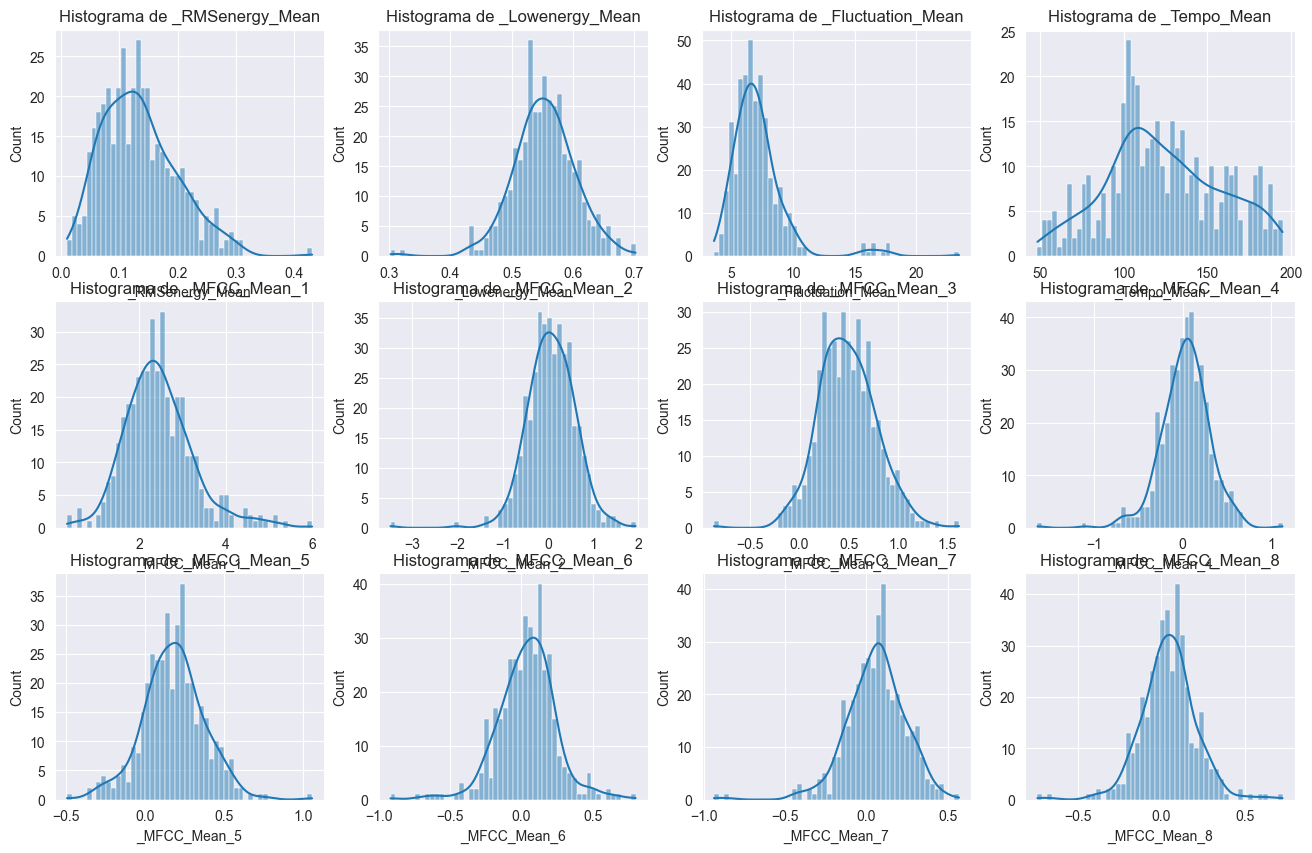

In [21]:
plt.figure(figsize=(16, 10))

for col in columnas_numericas.columns:
    plt.subplot(3, 4, columnas_numericas.columns.get_loc(col) + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title('Histograma de {}'.format(col))

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

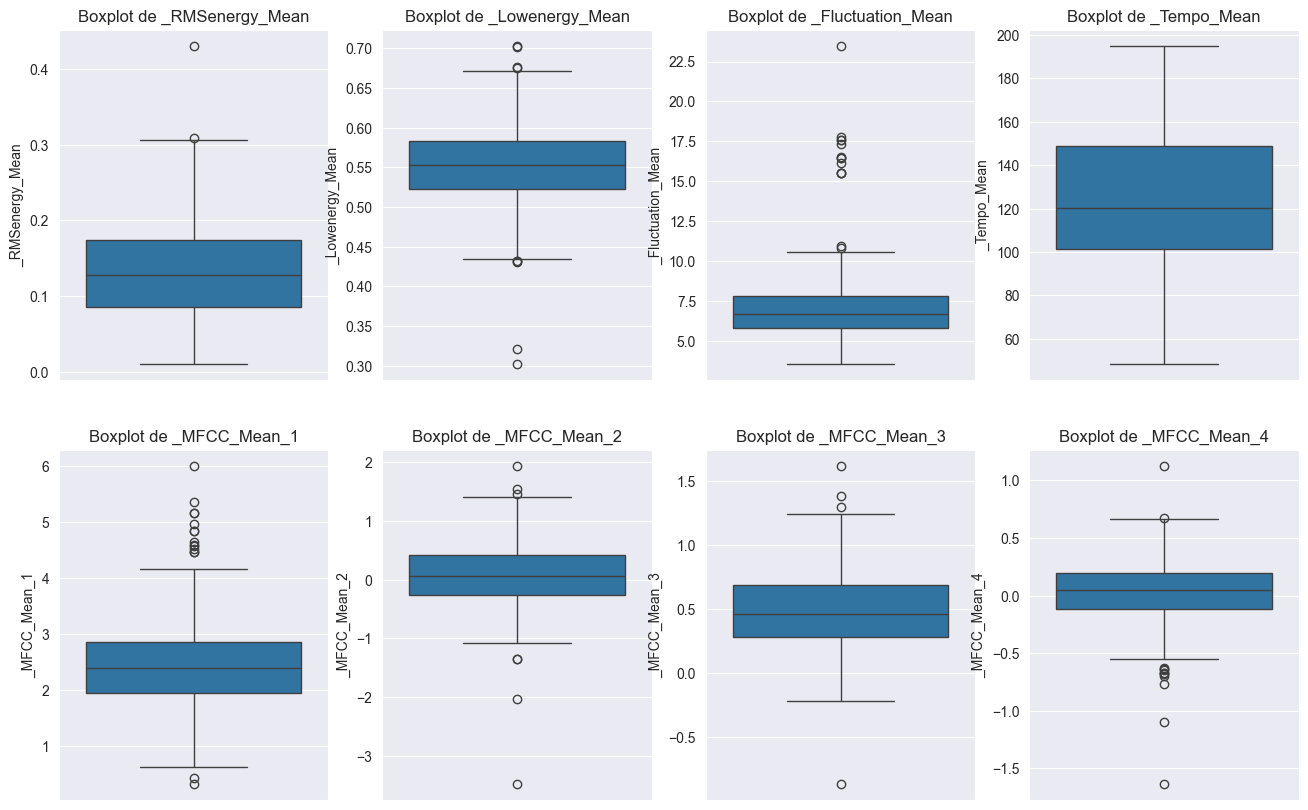

In [28]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()

In [35]:
df_limpio = df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

for col in numeric_cols:
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar
    df_limpio = df_limpio[(df_limpio[col] >= limite_inferior) & (df_limpio[col] <= limite_superior)]

    print(f"{col}: Filas restantes {df_limpio.shape[0]}")

_RMSenergy_Mean: Filas restantes 398
_Lowenergy_Mean: Filas restantes 390
_Fluctuation_Mean: Filas restantes 377
_Tempo_Mean: Filas restantes 377
_MFCC_Mean_1: Filas restantes 364
_MFCC_Mean_2: Filas restantes 356
_MFCC_Mean_3: Filas restantes 353
_MFCC_Mean_4: Filas restantes 345
_MFCC_Mean_5: Filas restantes 341
_MFCC_Mean_6: Filas restantes 326
_MFCC_Mean_7: Filas restantes 319
_MFCC_Mean_8: Filas restantes 310
_MFCC_Mean_9: Filas restantes 305
_MFCC_Mean_10: Filas restantes 301
_MFCC_Mean_11: Filas restantes 292
_MFCC_Mean_12: Filas restantes 288
_MFCC_Mean_13: Filas restantes 278
_Roughness_Mean: Filas restantes 265
_Roughness_Slope: Filas restantes 259
_Zero-crossingrate_Mean: Filas restantes 254
_AttackTime_Mean: Filas restantes 238
_AttackTime_Slope: Filas restantes 237
_Rolloff_Mean: Filas restantes 237
_Eventdensity_Mean: Filas restantes 234
_Pulseclarity_Mean: Filas restantes 228
_Brightness_Mean: Filas restantes 228
_Spectralcentroid_Mean: Filas restantes 227
_Spectralsprea

ValueError: num must be an integer with 1 <= num <= 8, not 9

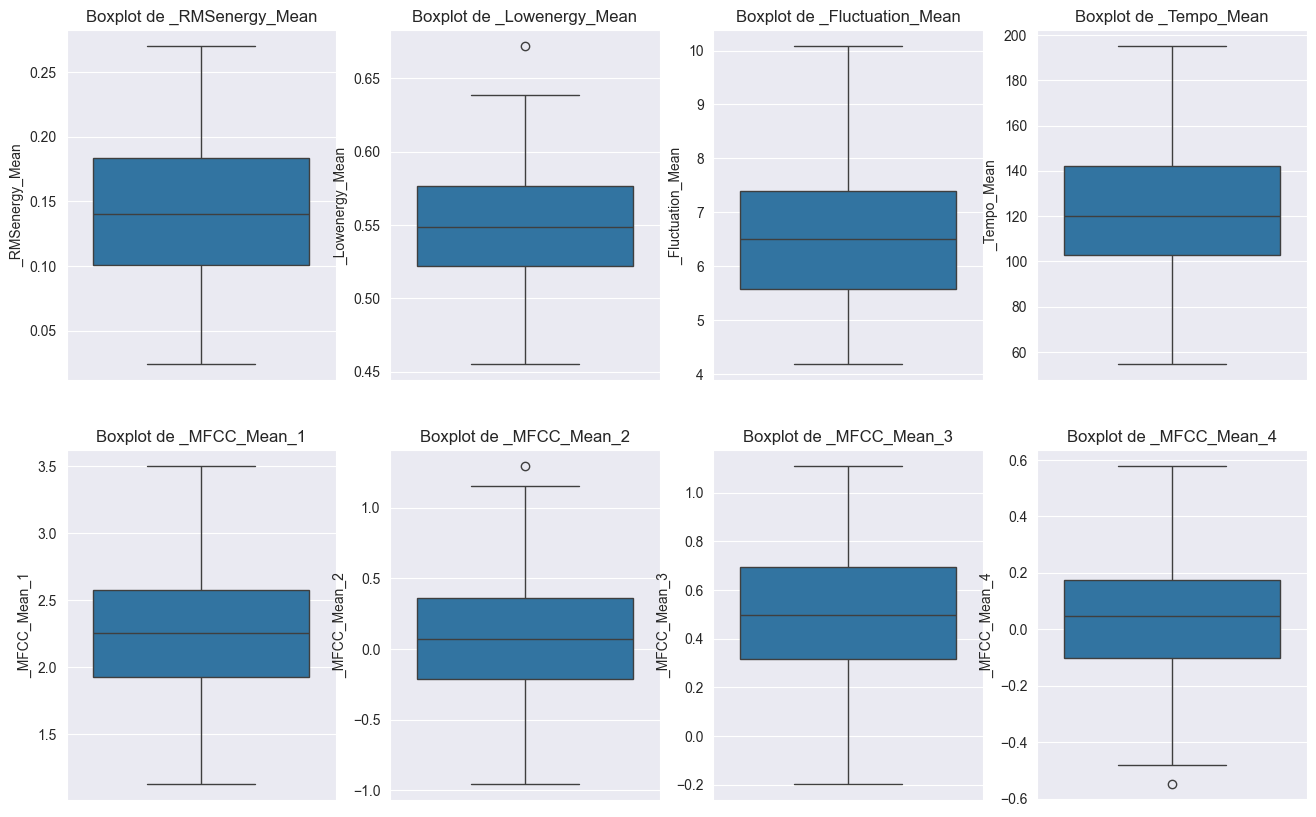

In [36]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df_limpio[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()

plt.show()

Variables de texto

In [38]:
df = df_limpio.copy()
num_no_numericos_columnas = df.select_dtypes(exclude=[np.number])
estadisticas_default = num_no_numericos_columnas.describe(include = 'object')

nom_estadisticas = {
    'top': 'Moda',
    'unique': 'Cardinalidad'
}

estadisticas = estadisticas_default.rename(index=nom_estadisticas).drop(index=['count','freq'])
estadisticas

,Class
Cardinalidad,4
Moda,angry


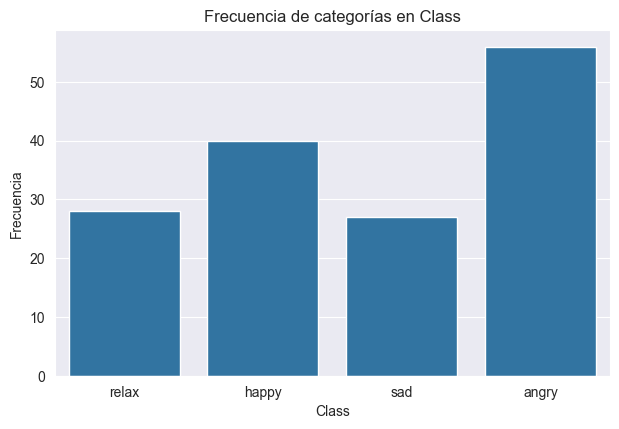

In [39]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_no_numericos_columnas):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title('Frecuencia de categorías en {}'.format(col))
    plt.ylabel('Frecuencia')
    plt.xlabel(col)

plt.tight_layout()

plt.show()

                   _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  \
_RMSenergy_Mean           1.000000        -0.281123          -0.170943   
_Lowenergy_Mean          -0.281123         1.000000           0.051927   
_Fluctuation_Mean        -0.170943         0.051927           1.000000   
_Tempo_Mean               0.001018        -0.041363          -0.119922   
_MFCC_Mean_1             -0.196514         0.123084           0.077035   

                   _Tempo_Mean  _MFCC_Mean_1  
_RMSenergy_Mean       0.001018     -0.196514  
_Lowenergy_Mean      -0.041363      0.123084  
_Fluctuation_Mean    -0.119922      0.077035  
_Tempo_Mean           1.000000     -0.065000  
_MFCC_Mean_1         -0.065000      1.000000  


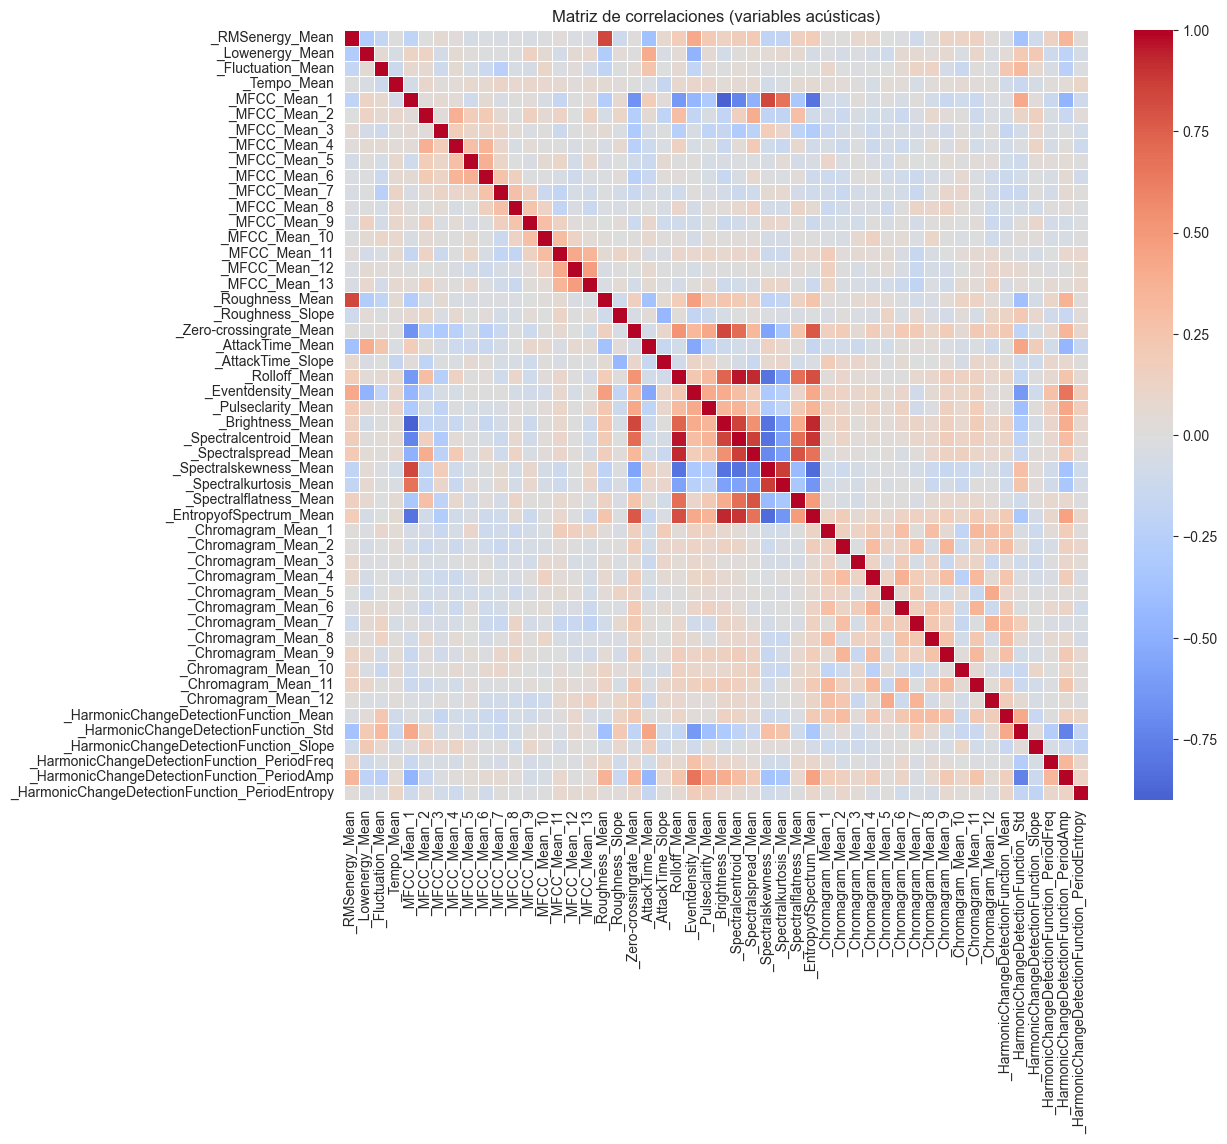

In [40]:
corr_matrix = df_numeric.corr()

# Mostrar parte de la matriz
print(corr_matrix.iloc[:5, :5])

# Visualización
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlaciones (variables acústicas)")
plt.show()

Transformaciones

In [42]:
target_col = "Class"

X = df_limpio.drop(columns=[target_col])
y = df_limpio[target_col]

#Categoricas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Clases originales:", list(le.classes_))
print("Primeros y codificados:", y.head(5).tolist(), "->", y_encoded[:5])


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Numericas
scaler = StandardScaler(with_mean=True, with_std=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled[:3], X_test_scaled[:3]

#Reduccion de dimencionalidad PCA
usar_pca = True
n_components = 50


pca = PCA(n_components=n_components, random_state=42)
X_train_final = pca.fit_transform(X_train_scaled)
X_test_final  = pca.transform(X_test_scaled)
print("Varianza explicada por componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.sum())


Clases originales: ['angry', 'happy', 'relax', 'sad']
Primeros y codificados: ['relax', 'relax', 'relax', 'relax', 'relax'] -> [2 2 2 2 2]
Varianza explicada por componente: [1.57080117e-01 8.97106575e-02 7.77808212e-02 6.67290051e-02
 5.33990332e-02 4.70116076e-02 4.09517393e-02 3.79319526e-02
 3.35048197e-02 3.19393733e-02 2.76376632e-02 2.50577301e-02
 2.38930642e-02 2.19180449e-02 2.03252301e-02 1.96004030e-02
 1.83641341e-02 1.63314992e-02 1.59544257e-02 1.52695980e-02
 1.46111095e-02 1.35918514e-02 1.24501023e-02 1.13110108e-02
 1.03291077e-02 9.57444196e-03 9.32589664e-03 8.97027760e-03
 8.53900024e-03 7.60802885e-03 7.10153623e-03 6.67198947e-03
 5.24911873e-03 5.03962401e-03 4.39307129e-03 4.17846570e-03
 3.89544212e-03 3.32978638e-03 2.83015909e-03 2.43209831e-03
 2.32198547e-03 1.92075503e-03 1.13811434e-03 8.26947254e-04
 7.26654774e-04 5.43159619e-04 4.43080261e-04 1.64767424e-04
 5.98385250e-05 3.16604952e-05]
Varianza acumulada: 1.0000000000000002


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_predRFC = clf.predict(X_test)

print(classification_report(y_test, y_predRFC, target_names=le.classes_))

              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.71      0.83      0.77         6
         sad       0.75      0.50      0.60         6

    accuracy                           0.84        31
   macro avg       0.82      0.81      0.80        31
weighted avg       0.84      0.84      0.83        31



In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb


params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=500,
    callbacks=[lgb.early_stopping(stopping_rounds=5)]

)

y_predGBM = model.predict(X_test_scaled)
y_pred_classesGBM = y_predGBM.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classesGBM, target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classesGBM))

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	training's multi_logloss: 0.295916	valid_1's multi_logloss: 0.597004

Classification Report:
              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.75      0.50      0.60         6
         sad       0.57      0.67      0.62         6

    accuracy                           0.81        31
   macro avg       0.78      0.77      0.77        31
weighted avg       0.81      0.81      0.80        31


Confusion Matrix:
[[10  0  0  1]
 [ 0  8  0  0]
 [ 0  1  3  2]
 [ 1  0  1  4]]


In [45]:
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import  StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def objective(trial):

    params = {
        'objective': 'multiclass',
        'num_class': len(np.unique(y)),
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',
        'verbosity': -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0)
    }


    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in kf.split(X_train_scaled, y_train):
        X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = lgb.LGBMClassifier(**params, n_estimators=500,verbose=-1)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='multi_logloss',
            callbacks=[lgb.early_stopping(stopping_rounds=5)]

        )

        preds = model.predict(X_val)
        f1 = f1_score(y_val, preds, average='macro')
        f1_scores.append(f1)

    return np.mean(f1_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Mejor modelo:")
print(study.best_trial.params)


best_params = study.best_trial.params
best_params.update({
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss'

})

final_model = lgb.LGBMClassifier(**best_params, n_estimators=800)
final_model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)],
                eval_metric='multi_logloss')



y_pred = final_model.predict(X_test_scaled)
print("\nReporte de clasificacion LightGBM (Optimizado):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

/Users/salvadorhernandez/Documents/worksplace/MLOps_Equipo19/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-11 17:17:10,393] A new study created in memory with name: no-name-4f4c2599-5811-4c94-b24b-c8982b9d4a91
Best trial: 0. Best value: 0.545431:   2%|▏         | 1/50 [00:00<00:09,  4.93it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.786589
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.962069
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 0.811931
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.826549
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.82229
[I 2025-10-11 17:17:10,601] Trial 0 finished with value: 0.5454311692779185 and parameters: {'learning_rate': 0.16759214701601965, 'num_leaves': 102, 'max_depth': 3, 'min_child_samples': 29, 'feature_fraction': 0.7151237716982659, 'bagging_fraction': 0.9030535209287511, 'bagging_freq': 2, 'lambda_l1': 0.00954677901247869, 'lambda

Best trial: 1. Best value: 0.569696:   4%|▍         | 2/50 [00:00<00:23,  2.01it/s]

Early stopping, best iteration is:
[120]	valid_0's multi_logloss: 0.833793
[I 2025-10-11 17:17:11,304] Trial 1 finished with value: 0.5696958356401081 and parameters: {'learning_rate': 0.06148271502028639, 'num_leaves': 191, 'max_depth': 13, 'min_child_samples': 26, 'feature_fraction': 0.7662171673415918, 'bagging_fraction': 0.7997144646135221, 'bagging_freq': 2, 'lambda_l1': 1.6307997264183043, 'lambda_l2': 3.8537508661905724}. Best is trial 1 with value: 0.5696958356401081.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[151]	valid_0's multi_logloss: 0.909571
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[128]	valid_0's multi_logloss: 0.988108
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[78]	valid_0's multi_logloss: 0.906758
Training until validation scores don't improve for 5 rounds


Best trial: 1. Best value: 0.569696:   6%|▌         | 3/50 [00:01<00:32,  1.45it/s]

Early stopping, best iteration is:
[160]	valid_0's multi_logloss: 0.854035
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's multi_logloss: 0.955855
[I 2025-10-11 17:17:12,227] Trial 2 finished with value: 0.5341542530397019 and parameters: {'learning_rate': 0.09515335946202026, 'num_leaves': 158, 'max_depth': 11, 'min_child_samples': 13, 'feature_fraction': 0.6930603308837445, 'bagging_fraction': 0.735274032185378, 'bagging_freq': 2, 'lambda_l1': 4.953800117551096, 'lambda_l2': 3.4127585444884656}. Best is trial 1 with value: 0.5696958356401081.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	valid_0's multi_logloss: 0.783489
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's multi_logloss: 0.922905
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[155]	valid_0's multi_l

Best trial: 1. Best value: 0.569696:   8%|▊         | 4/50 [00:03<00:41,  1.10it/s]

Early stopping, best iteration is:
[111]	valid_0's multi_logloss: 0.855538
[I 2025-10-11 17:17:13,465] Trial 3 finished with value: 0.5411586783529508 and parameters: {'learning_rate': 0.038313023849304496, 'num_leaves': 118, 'max_depth': 16, 'min_child_samples': 15, 'feature_fraction': 0.8250908432118487, 'bagging_fraction': 0.8050868299253635, 'bagging_freq': 6, 'lambda_l1': 2.730096251220362, 'lambda_l2': 0.801196893777873}. Best is trial 1 with value: 0.5696958356401081.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 

Best trial: 5. Best value: 0.604102:  12%|█▏        | 6/50 [00:03<00:22,  1.93it/s]

Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.882471
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.85927
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 0.928155
[I 2025-10-11 17:17:13,810] Trial 5 finished with value: 0.6041020948286395 and parameters: {'learning_rate': 0.07012935403495237, 'num_leaves': 127, 'max_depth': 16, 'min_child_samples': 32, 'feature_fraction': 0.7030610940674352, 'bagging_fraction': 0.6407802355497355, 'bagging_freq': 6, 'lambda_l1': 2.04697062423002, 'lambda_l2': 1.367764124172746}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.20684
Training until validation scores don't improve for 5 rounds


Best trial: 5. Best value: 0.604102:  14%|█▍        | 7/50 [00:03<00:19,  2.18it/s]

Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.22721
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.20987
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.21241
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.21663
[I 2025-10-11 17:17:14,116] Trial 6 finished with value: 0.2753304182376763 and parameters: {'learning_rate': 0.010657009412834121, 'num_leaves': 78, 'max_depth': 8, 'min_child_samples': 32, 'feature_fraction': 0.7723160937097615, 'bagging_fraction': 0.6557119003489392, 'bagging_freq': 2, 'lambda_l1': 2.564981203332019, 'lambda_l2': 0.4579546732969364}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's multi_logloss:

Best trial: 5. Best value: 0.604102:  16%|█▌        | 8/50 [00:04<00:18,  2.22it/s]

Early stopping, best iteration is:
[94]	valid_0's multi_logloss: 0.8195
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.884264
[I 2025-10-11 17:17:14,540] Trial 7 finished with value: 0.5280754797318266 and parameters: {'learning_rate': 0.2989185827178459, 'num_leaves': 102, 'max_depth': 14, 'min_child_samples': 11, 'feature_fraction': 0.846578130489337, 'bagging_fraction': 0.8606671169836353, 'bagging_freq': 1, 'lambda_l1': 4.725335722718819, 'lambda_l2': 3.6760657492215616}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.3

Best trial: 5. Best value: 0.604102:  20%|██        | 10/50 [00:05<00:26,  1.53it/s]

Early stopping, best iteration is:
[277]	valid_0's multi_logloss: 0.922801
[I 2025-10-11 17:17:16,352] Trial 9 finished with value: 0.5695780990034927 and parameters: {'learning_rate': 0.013667352589081236, 'num_leaves': 148, 'max_depth': 14, 'min_child_samples': 37, 'feature_fraction': 0.8279492412048324, 'bagging_fraction': 0.8057454544720306, 'bagging_freq': 2, 'lambda_l1': 2.4922282336096053, 'lambda_l2': 0.12843625700429906}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_loglos

Best trial: 5. Best value: 0.604102:  24%|██▍       | 12/50 [00:06<00:18,  2.07it/s]

Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.90059
[I 2025-10-11 17:17:16,790] Trial 11 finished with value: 0.5671555396787593 and parameters: {'learning_rate': 0.05732975175130209, 'num_leaves': 200, 'max_depth': 18, 'min_child_samples': 22, 'feature_fraction': 0.6200947093130696, 'bagging_fraction': 0.7067270252439629, 'bagging_freq': 8, 'lambda_l1': 1.48286987121539, 'lambda_l2': 1.368561353009803}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's multi_logloss: 0.835268
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's multi_logloss: 0.90694
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's multi_logloss: 0.884211
Training until validation scores don't improve for 5 rounds


Best trial: 5. Best value: 0.604102:  26%|██▌       | 13/50 [00:06<00:18,  2.02it/s]

Early stopping, best iteration is:
[104]	valid_0's multi_logloss: 0.66879
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's multi_logloss: 0.921405
[I 2025-10-11 17:17:17,320] Trial 12 finished with value: 0.5575314228255404 and parameters: {'learning_rate': 0.06915333808270542, 'num_leaves': 197, 'max_depth': 10, 'min_child_samples': 22, 'feature_fraction': 0.7575153152864612, 'bagging_fraction': 0.729730143373589, 'bagging_freq': 7, 'lambda_l1': 1.6004622112828533, 'lambda_l2': 3.0960901240687124}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[286]	valid_0's multi_logloss: 0.825127
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[188]	valid_0's multi_logloss: 0.977049
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[228]	valid_0's multi

Best trial: 5. Best value: 0.604102:  28%|██▊       | 14/50 [00:08<00:23,  1.56it/s]

Early stopping, best iteration is:
[161]	valid_0's multi_logloss: 0.957482
[I 2025-10-11 17:17:18,431] Trial 13 finished with value: 0.55485895554394 and parameters: {'learning_rate': 0.03673131351275716, 'num_leaves': 137, 'max_depth': 15, 'min_child_samples': 44, 'feature_fraction': 0.9624434276397189, 'bagging_fraction': 0.9227616065727366, 'bagging_freq': 4, 'lambda_l1': 3.709811082224637, 'lambda_l2': 2.6344912894410975}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[190]	valid_0's multi_logloss: 0.867053
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[101]	valid_0's multi_logloss: 0.994077
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[155]	valid_0's multi_logloss: 0.870958
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[186]	valid_0's multi

Best trial: 5. Best value: 0.604102:  30%|███       | 15/50 [00:09<00:25,  1.35it/s]

Early stopping, best iteration is:
[170]	valid_0's multi_logloss: 0.911338
[I 2025-10-11 17:17:19,468] Trial 14 finished with value: 0.5574032168382013 and parameters: {'learning_rate': 0.021411104608987187, 'num_leaves': 39, 'max_depth': 18, 'min_child_samples': 22, 'feature_fraction': 0.8956039304373273, 'bagging_fraction': 0.6994072331397173, 'bagging_freq': 10, 'lambda_l1': 1.7725304967967674, 'lambda_l2': 3.997018477792052}. Best is trial 5 with value: 0.6041020948286395.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.791815
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.922791
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.709535
Training until validation scores don't improve for 5 rounds


Best trial: 15. Best value: 0.606884:  32%|███▏      | 16/50 [00:09<00:24,  1.39it/s]

Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.716596
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.777853
[I 2025-10-11 17:17:20,119] Trial 15 finished with value: 0.6068842393416697 and parameters: {'learning_rate': 0.11601334886501183, 'num_leaves': 174, 'max_depth': 7, 'min_child_samples': 6, 'feature_fraction': 0.7314178814272055, 'bagging_fraction': 0.7766728523045867, 'bagging_freq': 4, 'lambda_l1': 0.4775906648854782, 'lambda_l2': 1.2304345063979631}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 0.778429
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.945819
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's multi_lo

Best trial: 15. Best value: 0.606884:  34%|███▍      | 17/50 [00:10<00:21,  1.56it/s]

Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.78148
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.870861
[I 2025-10-11 17:17:20,559] Trial 16 finished with value: 0.5518198296371671 and parameters: {'learning_rate': 0.12404205957764658, 'num_leaves': 168, 'max_depth': 7, 'min_child_samples': 6, 'feature_fraction': 0.6170267564447652, 'bagging_fraction': 0.6716032830205703, 'bagging_freq': 5, 'lambda_l1': 0.308882782334152, 'lambda_l2': 1.209015105505628}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.819521
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.882443
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's multi_loglo

Best trial: 15. Best value: 0.606884:  36%|███▌      | 18/50 [00:10<00:19,  1.68it/s]

Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.748511
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 0.846975
[I 2025-10-11 17:17:21,040] Trial 17 finished with value: 0.6065152576181989 and parameters: {'learning_rate': 0.17455078922098655, 'num_leaves': 127, 'max_depth': 6, 'min_child_samples': 6, 'feature_fraction': 0.712919095276549, 'bagging_fraction': 0.7653509210871305, 'bagging_freq': 7, 'lambda_l1': 0.8284554236416095, 'lambda_l2': 1.9507307348938396}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.801277
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.895813
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's multi_log

Best trial: 15. Best value: 0.606884:  38%|███▊      | 19/50 [00:11<00:18,  1.65it/s]

Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.715131
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.824788
[I 2025-10-11 17:17:21,667] Trial 18 finished with value: 0.586529676463887 and parameters: {'learning_rate': 0.16983442239441077, 'num_leaves': 65, 'max_depth': 6, 'min_child_samples': 5, 'feature_fraction': 0.7339714849189942, 'bagging_fraction': 0.7576052788581026, 'bagging_freq': 8, 'lambda_l1': 0.6418932268831219, 'lambda_l2': 2.0728006809287116}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's multi_logloss: 0.853877
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.91988
Training until validation scores don't improve for 5 rounds


Best trial: 15. Best value: 0.606884:  40%|████      | 20/50 [00:11<00:14,  2.01it/s]

Early stopping, best iteration is:
[20]	valid_0's multi_logloss: 0.778009
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 0.803342
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.807318
[I 2025-10-11 17:17:21,906] Trial 19 finished with value: 0.5426586640054133 and parameters: {'learning_rate': 0.19106566938995, 'num_leaves': 177, 'max_depth': 5, 'min_child_samples': 17, 'feature_fraction': 0.662842933451039, 'bagging_fraction': 0.8559041094999649, 'bagging_freq': 4, 'lambda_l1': 0.9772745200166932, 'lambda_l2': 2.651422916111809}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.805145
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's multi_loglos

Best trial: 15. Best value: 0.606884:  42%|████▏     | 21/50 [00:11<00:14,  2.06it/s]

Early stopping, best iteration is:
[35]	valid_0's multi_logloss: 0.671837
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's multi_logloss: 0.869361
[I 2025-10-11 17:17:22,357] Trial 20 finished with value: 0.5521237585943469 and parameters: {'learning_rate': 0.11925818471022744, 'num_leaves': 144, 'max_depth': 9, 'min_child_samples': 10, 'feature_fraction': 0.8879884998585675, 'bagging_fraction': 0.7810624630965228, 'bagging_freq': 7, 'lambda_l1': 1.1492216279816314, 'lambda_l2': 0.9120851898832092}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.815597
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.88066
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's multi_lo

Best trial: 15. Best value: 0.606884:  44%|████▍     | 22/50 [00:12<00:16,  1.68it/s]

Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.843302
[I 2025-10-11 17:17:23,221] Trial 21 finished with value: 0.5701929945699296 and parameters: {'learning_rate': 0.08422537601835639, 'num_leaves': 127, 'max_depth': 6, 'min_child_samples': 8, 'feature_fraction': 0.6966843468835815, 'bagging_fraction': 0.8495650285205886, 'bagging_freq': 6, 'lambda_l1': 2.1181114577901883, 'lambda_l2': 1.5141804482969348}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.773539
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's multi_logloss: 0.907057
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.929846
Training until validation scores don't improve for 5 rounds


Best trial: 15. Best value: 0.606884:  46%|████▌     | 23/50 [00:13<00:13,  2.04it/s]

Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.766147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 0.879517
[I 2025-10-11 17:17:23,460] Trial 22 finished with value: 0.5846513599358867 and parameters: {'learning_rate': 0.14741919504569131, 'num_leaves': 126, 'max_depth': 8, 'min_child_samples': 17, 'feature_fraction': 0.6587721989655188, 'bagging_fraction': 0.686891420505555, 'bagging_freq': 7, 'lambda_l1': 0.3072822722759927, 'lambda_l2': 1.7036129991805349}. Best is trial 15 with value: 0.6068842393416697.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.770728
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.918322
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_lo

Best trial: 23. Best value: 0.630087:  48%|████▊     | 24/50 [00:13<00:10,  2.54it/s]

[I 2025-10-11 17:17:23,626] Trial 23 finished with value: 0.6300868648894965 and parameters: {'learning_rate': 0.23716361738367467, 'num_leaves': 108, 'max_depth': 3, 'min_child_samples': 26, 'feature_fraction': 0.7331959766417594, 'bagging_fraction': 0.6032169007414145, 'bagging_freq': 5, 'lambda_l1': 0.5708155629267695, 'lambda_l2': 2.2242920226943905}. Best is trial 23 with value: 0.6300868648894965.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.725597
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.861468
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's multi_logloss: 0.718635
Training until validation scores don't improve for 5 rounds


Best trial: 23. Best value: 0.630087:  50%|█████     | 25/50 [00:13<00:08,  2.87it/s]

Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.675816
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's multi_logloss: 0.917989
[I 2025-10-11 17:17:23,869] Trial 24 finished with value: 0.5861307406044249 and parameters: {'learning_rate': 0.22750687228295444, 'num_leaves': 96, 'max_depth': 3, 'min_child_samples': 18, 'feature_fraction': 0.7893257015908305, 'bagging_fraction': 0.7582069020648226, 'bagging_freq': 3, 'lambda_l1': 0.465000263249588, 'lambda_l2': 2.3259726303943586}. Best is trial 23 with value: 0.6300868648894965.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.791276
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.957447
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logl

Best trial: 25. Best value: 0.640052:  52%|█████▏    | 26/50 [00:13<00:08,  2.96it/s]

Early stopping, best iteration is:
[45]	valid_0's multi_logloss: 0.647161
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.847337
[I 2025-10-11 17:17:24,182] Trial 25 finished with value: 0.640052236635054 and parameters: {'learning_rate': 0.23025789265191374, 'num_leaves': 54, 'max_depth': 5, 'min_child_samples': 9, 'feature_fraction': 0.7388640402253902, 'bagging_fraction': 0.6008608853208885, 'bagging_freq': 5, 'lambda_l1': 0.8118917638628075, 'lambda_l2': 2.941548297849413}. Best is trial 25 with value: 0.640052236635054.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.733004
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.932496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_loglos

Best trial: 26. Best value: 0.677324:  56%|█████▌    | 28/50 [00:14<00:05,  3.68it/s]

Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.65021
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.735104
[I 2025-10-11 17:17:24,469] Trial 26 finished with value: 0.6773240811476107 and parameters: {'learning_rate': 0.22355071051017114, 'num_leaves': 52, 'max_depth': 4, 'min_child_samples': 11, 'feature_fraction': 0.7425374091092346, 'bagging_fraction': 0.6066434029746204, 'bagging_freq': 5, 'lambda_l1': 0.014794037649629832, 'lambda_l2': 2.92777144926515}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.704199
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.903148
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_log

Best trial: 26. Best value: 0.677324:  58%|█████▊    | 29/50 [00:14<00:05,  3.74it/s]

Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.839749
[I 2025-10-11 17:17:24,878] Trial 28 finished with value: 0.5878266917121406 and parameters: {'learning_rate': 0.29824428585776475, 'num_leaves': 23, 'max_depth': 4, 'min_child_samples': 12, 'feature_fraction': 0.7860450177507647, 'bagging_fraction': 0.6321644185016073, 'bagging_freq': 3, 'lambda_l1': 1.217581192785983, 'lambda_l2': 2.995925143661244}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.757487
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.862178
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.823057
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's multi_logl

Best trial: 26. Best value: 0.677324:  60%|██████    | 30/50 [00:14<00:05,  3.84it/s]

Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.80824
[I 2025-10-11 17:17:25,123] Trial 29 finished with value: 0.5443395811275068 and parameters: {'learning_rate': 0.15374801750582137, 'num_leaves': 57, 'max_depth': 3, 'min_child_samples': 19, 'feature_fraction': 0.8674903605291723, 'bagging_fraction': 0.6071378195856949, 'bagging_freq': 3, 'lambda_l1': 0.2155900227826903, 'lambda_l2': 2.3567912265826685}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's multi_logloss: 0.789804
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 0.952746
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.821836
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_log

Best trial: 26. Best value: 0.677324:  62%|██████▏   | 31/50 [00:14<00:04,  4.00it/s]

Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 0.833208
[I 2025-10-11 17:17:25,349] Trial 30 finished with value: 0.5473443970889791 and parameters: {'learning_rate': 0.20620264619100462, 'num_leaves': 78, 'max_depth': 3, 'min_child_samples': 15, 'feature_fraction': 0.673744796971328, 'bagging_fraction': 0.6567354119438913, 'bagging_freq': 5, 'lambda_l1': 0.007558727589203951, 'lambda_l2': 3.441066653713123}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.802288
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.926193
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.771652
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  64%|██████▍   | 32/50 [00:15<00:05,  3.13it/s]

Early stopping, best iteration is:
[26]	valid_0's multi_logloss: 0.757635
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.878502
[I 2025-10-11 17:17:25,830] Trial 31 finished with value: 0.5977221522887157 and parameters: {'learning_rate': 0.13731895523217583, 'num_leaves': 66, 'max_depth': 5, 'min_child_samples': 8, 'feature_fraction': 0.7325392971561453, 'bagging_fraction': 0.9309408655726766, 'bagging_freq': 4, 'lambda_l1': 0.640178298250736, 'lambda_l2': 2.787214980142498}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's multi_logloss: 0.795244
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.850965
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_loglo

Best trial: 26. Best value: 0.677324:  66%|██████▌   | 33/50 [00:15<00:06,  2.76it/s]

Early stopping, best iteration is:
[52]	valid_0's multi_logloss: 0.724485
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.809556
[I 2025-10-11 17:17:26,290] Trial 32 finished with value: 0.5276578418141886 and parameters: {'learning_rate': 0.2332290055969667, 'num_leaves': 44, 'max_depth': 5, 'min_child_samples': 9, 'feature_fraction': 0.7386563593129919, 'bagging_fraction': 0.6269135113877083, 'bagging_freq': 4, 'lambda_l1': 1.2334832589477558, 'lambda_l2': 4.144845985141358}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's multi_logloss: 0.758641
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 0.892629
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  68%|██████▊   | 34/50 [00:16<00:06,  2.35it/s]

Early stopping, best iteration is:
[58]	valid_0's multi_logloss: 0.847185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.77576
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 0.860855
[I 2025-10-11 17:17:26,864] Trial 33 finished with value: 0.5597870675076557 and parameters: {'learning_rate': 0.09688907890934818, 'num_leaves': 25, 'max_depth': 7, 'min_child_samples': 13, 'feature_fraction': 0.7222772057051075, 'bagging_fraction': 0.6652609544793916, 'bagging_freq': 6, 'lambda_l1': 0.5811090290141816, 'lambda_l2': 4.999349465923243}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  70%|███████   | 35/50 [00:16<00:05,  2.78it/s]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.666063
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 0.856015
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's multi_logloss: 0.837136
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 0.730738
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's multi_logloss: 0.893774
[I 2025-10-11 17:17:27,070] Trial 34 finished with value: 0.5877352467793645 and parameters: {'learning_rate': 0.19192663208831998, 'num_leaves': 92, 'max_depth': 7, 'min_child_samples': 28, 'feature_fraction': 0.7635572939571457, 'bagging_fraction': 0.60055224631117, 'bagging_freq': 5, 'lambda_l1': 0.8181018058372923, 'lambda_l2': 3.3283548362495625}. Best is trial 26 with value: 0.6773

Best trial: 26. Best value: 0.677324:  72%|███████▏  | 36/50 [00:16<00:04,  3.27it/s]

Early stopping, best iteration is:
[7]	valid_0's multi_logloss: 0.934977
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.725756
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.784033
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's multi_logloss: 0.896422
[I 2025-10-11 17:17:27,249] Trial 35 finished with value: 0.5869047387081443 and parameters: {'learning_rate': 0.2605714146724701, 'num_leaves': 110, 'max_depth': 4, 'min_child_samples': 14, 'feature_fraction': 0.6807215801651201, 'bagging_fraction': 0.7269595756043202, 'bagging_freq': 3, 'lambda_l1': 0.2520419798982203, 'lambda_l2': 2.403040629303971}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	valid_0's multi_loglo

Best trial: 26. Best value: 0.677324:  74%|███████▍  | 37/50 [00:18<00:08,  1.60it/s]

Early stopping, best iteration is:
[108]	valid_0's multi_logloss: 0.786268
[I 2025-10-11 17:17:28,626] Trial 36 finished with value: 0.5633360911534286 and parameters: {'learning_rate': 0.04382597003391027, 'num_leaves': 183, 'max_depth': 9, 'min_child_samples': 5, 'feature_fraction': 0.6385675508335755, 'bagging_fraction': 0.6448681235019319, 'bagging_freq': 6, 'lambda_l1': 0.48258789218107623, 'lambda_l2': 2.1883954089981343}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's multi_logloss: 0.794879
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's multi_logloss: 0.925001
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  76%|███████▌  | 38/50 [00:18<00:06,  1.76it/s]

Early stopping, best iteration is:
[64]	valid_0's multi_logloss: 0.789261
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 0.758385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's multi_logloss: 0.862839
[I 2025-10-11 17:17:29,057] Trial 37 finished with value: 0.559199329222549 and parameters: {'learning_rate': 0.07923178031588599, 'num_leaves': 162, 'max_depth': 5, 'min_child_samples': 24, 'feature_fraction': 0.8029301953714465, 'bagging_fraction': 0.68293883007332, 'bagging_freq': 1, 'lambda_l1': 1.3526572357506441, 'lambda_l2': 0.8052521469148912}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	valid_0's multi_logloss: 0.829538
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's multi_lo

Best trial: 26. Best value: 0.677324:  78%|███████▊  | 39/50 [00:19<00:07,  1.57it/s]

Early stopping, best iteration is:
[109]	valid_0's multi_logloss: 0.859434
[I 2025-10-11 17:17:29,860] Trial 38 finished with value: 0.5927537821655469 and parameters: {'learning_rate': 0.1257578009202764, 'num_leaves': 49, 'max_depth': 3, 'min_child_samples': 11, 'feature_fraction': 0.7090703075841606, 'bagging_fraction': 0.626553943207426, 'bagging_freq': 5, 'lambda_l1': 3.902126726680074, 'lambda_l2': 2.805803612964244}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.847207
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.923677
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  80%|████████  | 40/50 [00:19<00:06,  1.65it/s]

Early stopping, best iteration is:
[171]	valid_0's multi_logloss: 0.733666
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's multi_logloss: 0.742663
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's multi_logloss: 0.83292
[I 2025-10-11 17:17:30,387] Trial 39 finished with value: 0.5578452361192299 and parameters: {'learning_rate': 0.27063672475318795, 'num_leaves': 68, 'max_depth': 8, 'min_child_samples': 8, 'feature_fraction': 0.7818130068444648, 'bagging_fraction': 0.9850668036425778, 'bagging_freq': 4, 'lambda_l1': 2.1574168571604946, 'lambda_l2': 3.707446823266364}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 1.05134
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's multi_logloss

Best trial: 26. Best value: 0.677324:  80%|████████  | 40/50 [00:20<00:06,  1.65it/s]

Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 1.28137
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 1.21118
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 1.20732
[I 2025-10-11 17:17:30,446] Trial 40 finished with value: 0.341921871232216 and parameters: {'learning_rate': 0.1688089905211528, 'num_leaves': 82, 'max_depth': 11, 'min_child_samples': 41, 'feature_fraction': 0.6941058745437382, 'bagging_fraction': 0.8291200195152187, 'bagging_freq': 5, 'lambda_l1': 1.8362723354211652, 'lambda_l2': 1.0006471614211891}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's multi_logloss: 0.723173
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 

Best trial: 26. Best value: 0.677324:  84%|████████▍ | 42/50 [00:20<00:03,  2.25it/s]

Early stopping, best iteration is:
[37]	valid_0's multi_logloss: 0.701731
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.75454
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.846185
[I 2025-10-11 17:17:30,904] Trial 41 finished with value: 0.5883274418220239 and parameters: {'learning_rate': 0.18373455939382777, 'num_leaves': 109, 'max_depth': 6, 'min_child_samples': 6, 'feature_fraction': 0.719070518278563, 'bagging_fraction': 0.8887707229256817, 'bagging_freq': 7, 'lambda_l1': 0.8268178853193188, 'lambda_l2': 1.6914105447525638}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 0.833949
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's multi_logl

Best trial: 26. Best value: 0.677324:  88%|████████▊ | 44/50 [00:20<00:02,  2.92it/s]

Early stopping, best iteration is:
[17]	valid_0's multi_logloss: 0.745048
[I 2025-10-11 17:17:31,227] Trial 42 finished with value: 0.6084233143017973 and parameters: {'learning_rate': 0.21905690987439036, 'num_leaves': 152, 'max_depth': 6, 'min_child_samples': 7, 'feature_fraction': 0.75703142081487, 'bagging_fraction': 0.7872338582965396, 'bagging_freq': 8, 'lambda_l1': 1.0102613613802505, 'lambda_l2': 0.4168883738540977}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 0.78117
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.898558
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's multi_logloss: 0.758171
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's multi_loglo

Best trial: 26. Best value: 0.677324:  90%|█████████ | 45/50 [00:21<00:01,  3.50it/s]

Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 0.903085
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's multi_logloss: 0.760747
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[7]	valid_0's multi_logloss: 0.737707
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.708927
[I 2025-10-11 17:17:31,500] Trial 44 finished with value: 0.5958201765554707 and parameters: {'learning_rate': 0.29398122770345975, 'num_leaves': 184, 'max_depth': 5, 'min_child_samples': 35, 'feature_fraction': 0.8328226551421369, 'bagging_fraction': 0.7863357739088593, 'bagging_freq': 8, 'lambda_l1': 0.23538924759265978, 'lambda_l2': 0.5056415680005659}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_lo

Best trial: 26. Best value: 0.677324:  92%|█████████▏| 46/50 [00:21<00:01,  3.47it/s]

Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.832306
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 0.740786
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.865978
[I 2025-10-11 17:17:31,793] Trial 45 finished with value: 0.5872041520570933 and parameters: {'learning_rate': 0.1078527183257446, 'num_leaves': 117, 'max_depth': 7, 'min_child_samples': 15, 'feature_fraction': 0.7672246581035544, 'bagging_fraction': 0.6194687896385487, 'bagging_freq': 6, 'lambda_l1': 0.734340348238238, 'lambda_l2': 0.2819288125451313}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.863911
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  94%|█████████▍| 47/50 [00:21<00:00,  3.64it/s]

Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.82408
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.792137
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 0.822764
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's multi_logloss: 0.79345
[I 2025-10-11 17:17:32,035] Trial 46 finished with value: 0.5950702896175033 and parameters: {'learning_rate': 0.21008713521250946, 'num_leaves': 165, 'max_depth': 12, 'min_child_samples': 10, 'feature_fraction': 0.8072055909598516, 'bagging_fraction': 0.7138573972706906, 'bagging_freq': 9, 'lambda_l1': 0.4710317259063068, 'lambda_l2': 0.6958160448219058}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_log

Best trial: 26. Best value: 0.677324:  96%|█████████▌| 48/50 [00:21<00:00,  3.74it/s]

Early stopping, best iteration is:
[30]	valid_0's multi_logloss: 0.807524
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.889909
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's multi_logloss: 0.684285
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 0.834995
[I 2025-10-11 17:17:32,285] Trial 47 finished with value: 0.5753165105448387 and parameters: {'learning_rate': 0.14922830625158498, 'num_leaves': 155, 'max_depth': 9, 'min_child_samples': 20, 'feature_fraction': 0.7526206527089848, 'bagging_fraction': 0.6460355111015192, 'bagging_freq': 4, 'lambda_l1': 1.4254608744702975, 'lambda_l2': 1.1162530156343409}. Best is trial 26 with value: 0.6773240811476107.
Training until validation scores don't improve for 5 rounds


Best trial: 26. Best value: 0.677324:  98%|█████████▊| 49/50 [00:22<00:00,  3.82it/s]

Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 0.867757
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.923059
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's multi_logloss: 0.80146
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[6]	valid_0's multi_logloss: 0.947151
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's multi_logloss: 0.843477
[I 2025-10-11 17:17:32,534] Trial 48 finished with value: 0.5598774509803921 and parameters: {'learning_rate': 0.23499882279553724, 'num_leaves': 31, 'max_depth': 4, 'min_child_samples': 12, 'feature_fraction': 0.7363207027071352, 'bagging_fraction': 0.7432283151899646, 'bagging_freq': 6, 'lambda_l1': 0.15327572109629925, 'lambda_l2': 3.295519761378673}. Best is trial 26 with value: 0.6773

Best trial: 26. Best value: 0.677324: 100%|██████████| 50/50 [00:22<00:00,  2.26it/s]


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.32776
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34665
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.34355
[I 2025-10-11 17:17:32,566] Trial 49 finished with value: 0.13636363636363635 and parameters: {'learning_rate': 0.047922651427231025, 'num_leaves': 92, 'max_depth': 6, 'min_child_samples': 46, 'feature_fraction': 0.7805311224483598, 'bagging_fraction': 0.8868685471363494, 'bagging_freq': 5, 'lambda_l1': 0.9670767760710245, 'lambda_l2': 0.

In [46]:
print("\nClassification Report Random Forest Classifier:")
print(classification_report(y_test, y_predRFC, target_names=le.classes_))


print("\nClassification Report LightGBM:")
print(classification_report(y_test, y_pred_classesGBM, target_names=le.classes_))

print("\nReporte de clasificacion LightGBM (Optimizado):")
print(classification_report(y_test, y_pred, target_names=le.classes_))





Classification Report Random Forest Classifier:
              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.71      0.83      0.77         6
         sad       0.75      0.50      0.60         6

    accuracy                           0.84        31
   macro avg       0.82      0.81      0.80        31
weighted avg       0.84      0.84      0.83        31


Classification Report LightGBM:
              precision    recall  f1-score   support

       angry       0.91      0.91      0.91        11
       happy       0.89      1.00      0.94         8
       relax       0.75      0.50      0.60         6
         sad       0.57      0.67      0.62         6

    accuracy                           0.81        31
   macro avg       0.78      0.77      0.77        31
weighted avg       0.81      0.81      0.80        31


Reporte de clasificacion LightGBM (Optimizado):